In [11]:
# Session 31 -  ML Project 4 APPLICATION OF CLUSTERING MODELS by Sreedhara Jagatagar Sreenivasa

#Problem 1: 
#There are various stocks for which we have collected a data set, which all stocks are 
#apparently similar in performance 
 
#Problem 2: 
#How many Unique patterns that exist in the historical stock data set, based on 
#fluctuations in price. 
 
#Problem 3: 
#Identify which all stocks are moving together and which all stocks are different from  each other. 

In [2]:
#import Libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Data
url='ml_cluster_project\data_stocks.csv'
df_stock=pd.read_csv(url)

In [4]:
df_stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [165]:
#Drop Date Field
x = df_stock.drop('DATE', axis=1)

In [166]:
#Transpose the stocks
df_stock_T=x.T

In [167]:
df_stock_T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
SP500,2363.6101,2364.1001,2362.6799,2364.3101,2364.8501,2365.6201,2365.200,2365.29,2364.3201,2364.6399,...,2471.8899,2472.770,2472.8999,2472.6399,2472.020,2472.220,2471.77,2470.030,2471.490,2471.49
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.470,42.47,42.3900,42.3300,...,44.7200,44.730,44.7600,44.7500,44.710,44.720,44.73,44.740,44.710,44.74
NASDAQ.AAPL,143.6800,143.7000,143.6901,143.6400,143.6600,143.7800,143.864,143.81,143.8150,143.8000,...,164.1600,164.060,164.1900,164.2000,164.140,164.110,164.12,164.010,163.880,163.98
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.180,130.14,130.1000,130.2100,...,155.0600,155.010,155.1200,155.0900,155.040,155.090,155.16,155.065,154.960,155.16
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.120,82.19,82.2300,82.1650,...,83.7100,83.700,83.6300,83.6900,83.660,83.670,83.65,83.620,83.580,83.69
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.330,102.37,102.3800,102.3300,...,106.6200,106.560,106.6200,106.6000,106.630,106.565,106.59,106.520,106.400,106.47
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.912,85.82,85.8800,85.8600,...,114.5300,114.510,114.5600,114.5150,114.450,114.490,114.52,114.470,114.330,114.46
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.540,59.41,59.4300,59.2600,...,47.1350,47.115,47.1250,47.1300,47.145,47.150,47.15,47.150,47.135,47.15
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.630,121.61,121.7150,121.8500,...,142.6450,142.460,142.8750,142.8300,142.630,142.425,142.45,142.330,142.170,142.41
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.960,38.96,38.9125,38.8900,...,45.1900,45.165,45.1650,45.1800,45.130,45.130,45.13,45.135,45.065,45.12


In [70]:
#Fit the data using Kmeans Algoritham
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6, random_state=0,max_iter=3000) 
k_means.fit(df_stock_T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [71]:
#Show the Lables or Groupings of different Stocks
k_means.labels_

array([1, 3, 5, 0, 0, 0, 0, 3, 0, 3, 3, 5, 2, 3, 5, 3, 5, 3, 0, 0, 3, 3,
       4, 3, 3, 0, 5, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 3, 4, 3, 3, 3, 0, 3,
       5, 0, 0, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 5, 5, 5, 0, 3, 3, 0,
       2, 0, 0, 0, 3, 5, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 5, 3, 0, 0, 3, 3,
       5, 3, 3, 3, 1, 3, 3, 3, 3, 4, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3,
       0, 5, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 5,
       3, 3, 3, 0, 0, 5, 3, 3, 0, 3, 0, 0, 0, 0, 3, 5, 0, 0, 3, 5, 0, 3,
       3, 0, 0, 0, 3, 5, 0, 0, 0, 5, 4, 5, 3, 3, 3, 3, 5, 5, 3, 3, 3, 3,
       4, 3, 3, 5, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 5, 3,
       0, 3, 4, 5, 3, 0, 3, 0, 3, 3, 0, 5, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 3, 3, 5, 0, 0, 3, 0, 3, 0, 3, 3, 3, 5, 3, 0,
       3, 3, 3, 0, 0, 3, 3, 5, 3, 3, 3, 3, 3, 0, 0, 3, 5, 5, 3, 3, 0, 3,
       3, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 5,

In [72]:
# Display  Cluster Center
k_means.cluster_centers_

array([[ 100.23500059,  100.25712663,  100.28608225, ...,  106.3046858 ,
         106.24284024,  106.2937574 ],
       [2069.93505   , 2071.78035   , 2070.11495   , ..., 2161.16      ,
        2161.86995   , 2161.785     ],
       [ 833.065     ,  834.731825  ,  836.18485   , ...,  968.965     ,
         968.475     ,  969.96      ],
       [  45.30378517,   45.2988076 ,   45.2928616 , ...,   44.5489635 ,
          44.52296122,   44.54246768],
       [ 426.37428571,  426.76857143,  426.57071429, ...,  423.74071429,
         423.49142857,  423.88142857],
       [ 189.11008929,  189.19576786,  189.26688036, ...,  199.624025  ,
         199.48060714,  199.584375  ]])

In [78]:
#Assign to X
X = df_stock_T

# Elbow method to determine optimal value of k

In [79]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

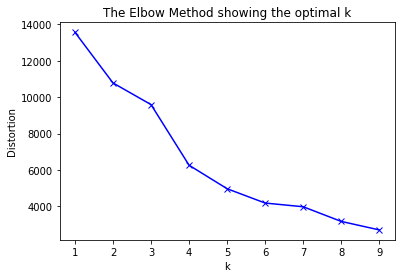

In [80]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [84]:
# Change to number of cluster to 4 as Optimal One
k_means = KMeans(n_clusters=8, random_state=0,max_iter=3000) 
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [85]:
# Display K Means Label
k_means.labels_

array([1, 6, 0, 0, 2, 2, 2, 6, 0, 6, 6, 0, 3, 6, 4, 6, 4, 6, 2, 0, 2, 2,
       4, 2, 6, 0, 0, 6, 6, 0, 2, 2, 6, 6, 2, 2, 2, 6, 7, 2, 6, 6, 0, 6,
       0, 0, 0, 6, 6, 6, 6, 2, 3, 3, 6, 6, 2, 6, 6, 0, 0, 0, 0, 6, 6, 0,
       3, 2, 2, 2, 6, 0, 2, 6, 2, 6, 6, 2, 6, 6, 6, 2, 0, 6, 2, 0, 6, 6,
       4, 6, 6, 2, 5, 6, 6, 6, 2, 7, 6, 6, 2, 2, 6, 2, 6, 2, 6, 6, 2, 6,
       2, 4, 6, 2, 2, 0, 2, 2, 6, 0, 0, 2, 2, 6, 6, 0, 2, 2, 6, 0, 6, 4,
       6, 2, 6, 0, 2, 4, 2, 6, 2, 6, 2, 2, 2, 2, 2, 0, 0, 0, 6, 0, 0, 6,
       6, 0, 2, 0, 6, 0, 2, 2, 2, 0, 7, 4, 6, 6, 6, 6, 4, 0, 6, 6, 6, 6,
       7, 6, 6, 0, 6, 6, 0, 2, 6, 2, 2, 0, 6, 2, 2, 2, 6, 6, 6, 6, 0, 2,
       0, 2, 7, 0, 6, 2, 6, 2, 6, 6, 2, 4, 6, 6, 6, 2, 6, 6, 2, 2, 0, 2,
       6, 2, 0, 2, 2, 2, 6, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 6, 2, 0, 2,
       0, 2, 2, 2, 6, 2, 2, 6, 2, 4, 2, 2, 6, 0, 6, 2, 6, 2, 6, 4, 6, 2,
       6, 6, 6, 2, 0, 6, 2, 4, 6, 6, 6, 6, 6, 2, 2, 6, 4, 0, 6, 6, 2, 2,
       6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 2, 4,

In [160]:
# Add Cluster number to the data
X['Cluster_Num']=k_means.labels_

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster_Num
SP500,2363.6101,2364.1001,2362.6799,2364.3101,2364.8501,2365.6201,2365.2000,2365.2900,2364.3201,2364.6399,...,2472.7700,2472.8999,2472.6399,2472.0200,2472.2200,2471.7700,2470.030,2471.4900,2471.490,1
NASDAQ.AAL,42.3300,42.3600,42.3100,42.3700,42.5378,42.5399,42.4700,42.4700,42.3900,42.3300,...,44.7300,44.7600,44.7500,44.7100,44.7200,44.7300,44.740,44.7100,44.740,6
NASDAQ.AAPL,143.6800,143.7000,143.6901,143.6400,143.6600,143.7800,143.8640,143.8100,143.8150,143.8000,...,164.0600,164.1900,164.2000,164.1400,164.1100,164.1200,164.010,163.8800,163.980,0
NASDAQ.ADBE,129.6300,130.3200,130.2250,130.0729,129.8800,130.0700,130.1800,130.1400,130.1000,130.2100,...,155.0100,155.1200,155.0900,155.0400,155.0900,155.1600,155.065,154.9600,155.160,0
NASDAQ.ADI,82.0400,82.0800,82.0300,82.0000,82.0350,82.0400,82.1200,82.1900,82.2300,82.1650,...,83.7000,83.6300,83.6900,83.6600,83.6700,83.6500,83.620,83.5800,83.690,2
NASDAQ.ADP,102.2300,102.1400,102.2125,102.1400,102.0600,102.0400,102.3300,102.3700,102.3800,102.3300,...,106.5600,106.6200,106.6000,106.6300,106.5650,106.5900,106.520,106.4000,106.470,2
NASDAQ.ADSK,85.2200,85.6500,85.5100,85.4872,85.7001,85.9200,85.9120,85.8200,85.8800,85.8600,...,114.5100,114.5600,114.5150,114.4500,114.4900,114.5200,114.470,114.3300,114.460,2
NASDAQ.AKAM,59.7600,59.8400,59.7950,59.6200,59.6200,59.6100,59.5400,59.4100,59.4300,59.2600,...,47.1150,47.1250,47.1300,47.1450,47.1500,47.1500,47.150,47.1350,47.150,6
NASDAQ.ALXN,121.5200,121.4800,121.9300,121.4400,121.6000,121.7000,121.6300,121.6100,121.7150,121.8500,...,142.4600,142.8750,142.8300,142.6300,142.4250,142.4500,142.330,142.1700,142.410,0
NASDAQ.AMAT,38.9900,39.0100,38.9100,38.8400,38.9300,38.9500,38.9600,38.9600,38.9125,38.8900,...,45.1650,45.1650,45.1800,45.1300,45.1300,45.1300,45.135,45.0650,45.120,6


Populating the interactive namespace from numpy and matplotlib


C:\Sreedhara\DataScientist\Install\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'power', 'linalg', 'fft', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


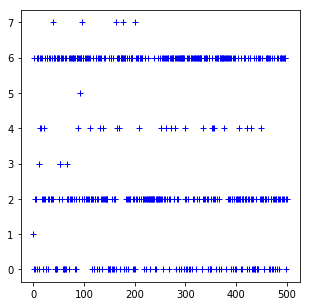

In [169]:
#Plot the K Values and shows the Clustered Group
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

figsize(5,5)
plot(k_means.labels_,'b+')

# Problem 1: 
### There are various stocks for which we have collected a data set, which all stocks are  apparently similar in performance 

In [155]:
#Below each group having similar performance.
df_stock_similar=pd.DataFrame(X.index)
df_stock_similar=pd.DataFrame(X.Cluster_Num)

df_stock_similar.sort_values(['Cluster_Num'], ascending=True)

,Cluster_Num
NYSE.CMI,0
NYSE.IT,0
NYSE.IFF,0
NYSE.ACN,0
NASDAQ.INTU,0
NYSE.ROK,0
NYSE.IBM,0
NASDAQ.INCY,0
NASDAQ.ILMN,0
NASDAQ.IDXX,0


# Problem 2: 
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price


In [159]:
print('There are 8 Unique Pattren out of 501 stock')
df_stock_similar.Cluster_Num.unique()

There are 8 Unique Pattren out of 501 stock


array([1, 6, 0, 2, 3, 4, 7, 5], dtype=int64)

# Problem 3: 
#### Identify which all stocks are moving together and which all stocks are different from  each other. 

In [162]:
#Stocks are moving together are Ascending Order
X.sort_values(['Cluster_Num'], ascending=True)

,0,1,2,3,4,5,6,7,8,9,...,41257,41258,41259,41260,41261,41262,41263,41264,41265,Cluster_Num
NYSE.CMI,151.410,151.5900,151.4500,151.1500,151.3800,151.6400,151.6700,151.5500,151.5500,151.1600,...,159.2750,159.3600,159.3600,159.3625,159.3600,159.380,159.3700,159.2750,159.360,0
NYSE.IT,110.150,110.1500,110.1500,110.1500,110.1500,110.1500,110.1500,110.1500,110.1500,110.1500,...,120.7700,120.7900,120.7800,120.7100,120.7200,120.690,120.6450,120.5900,120.600,0
NYSE.IFF,132.740,132.7750,132.4000,132.1300,132.1500,131.9700,132.0100,132.0100,132.4400,132.6000,...,136.7900,136.8200,136.8400,136.7700,136.7200,136.840,136.7850,136.7500,136.830,0
NYSE.ACN,117.940,117.9500,117.7262,117.4100,117.1700,117.0800,117.3300,117.1900,117.2700,117.1600,...,130.7400,130.7700,130.7375,130.7200,130.7500,130.740,130.7300,130.6300,130.670,0
NASDAQ.INTU,116.050,115.7900,115.6800,115.4700,115.4612,115.4500,115.6900,115.9000,115.8200,115.9000,...,141.4100,141.4400,141.4600,141.4200,141.4800,141.470,141.4100,141.3600,141.450,0
NYSE.ROK,155.420,155.9900,156.2300,156.0700,155.8500,156.0000,156.0000,155.9800,156.0150,155.8200,...,164.2000,164.2101,164.2300,164.2000,164.0750,164.075,164.0400,163.9500,164.050,0
NYSE.IBM,173.560,173.5600,173.6500,173.7800,173.6800,173.5800,173.6100,173.7388,173.8000,173.8850,...,143.0900,143.0900,143.1570,143.1200,143.1100,143.150,143.1400,143.0700,143.040,0
NASDAQ.INCY,134.930,135.6100,135.8999,135.6200,136.5800,136.7000,137.2500,137.6500,138.5600,140.3700,...,136.8508,137.1800,137.2800,137.2738,137.4550,137.370,137.5197,137.4100,137.410,0
NASDAQ.ILMN,171.000,171.2950,171.0540,170.8200,170.8384,170.7150,171.3700,171.2700,170.9300,170.7700,...,204.0200,204.1400,204.1150,204.1000,204.1600,204.190,204.2300,204.0700,204.460,0
NASDAQ.IDXX,155.070,155.4837,155.7100,155.5000,155.3500,155.3800,155.3411,155.4265,155.2950,155.4900,...,155.7800,155.7600,155.7800,155.6600,155.5800,155.630,155.6200,155.3700,155.430,0
